<a href="https://colab.research.google.com/github/caklem/PCVK_Ganjil_2023/blob/main/Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Mohammad Halim Perdana
### kelas : 3F
### Nim : 2141720236




#  **D**. **Praktikum**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


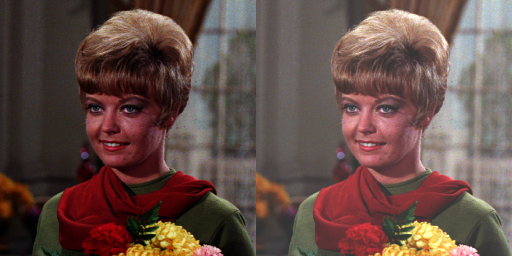

In [4]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np



print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas** **Praktikum**

**1.** **Inverse** **Citra**

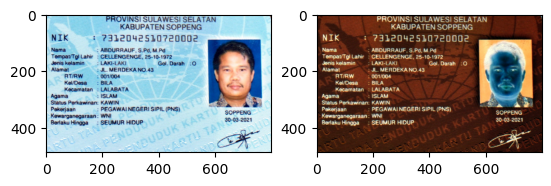

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)


**2. Contrast**

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50
masukan kontrast: [1.0 - 3.0]2


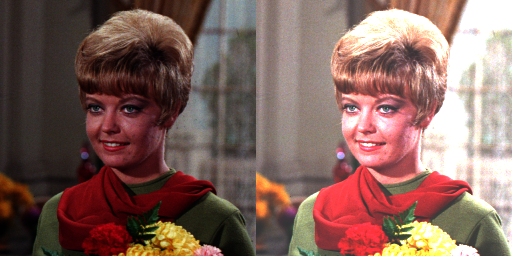

In [7]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np



print('Mengubah contrast dan tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan [-255 - 255]: '))
    contrast = float(input('masukan kontrast [1.0 - 3.0] :'))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

**3.Tranformasi logarithmic**

Mengubah tingkat kecerahan citra dengan transform log
-----------------------------------------------------
Masukan nilai kecerahan [-255 - 255]: 50


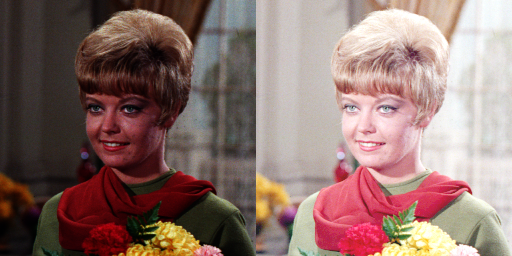

In [9]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np



print('Mengubah tingkat kecerahan citra dengan transform log')
print('-----------------------------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan [-255 - 255]: '))

except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
# brightness_image = np.zeros(original.shape, original.dtype)
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness* (np.log(1 + original[y,x,c])), 0, 255)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**4.Tranformasi Grayscale**



*   Averaging



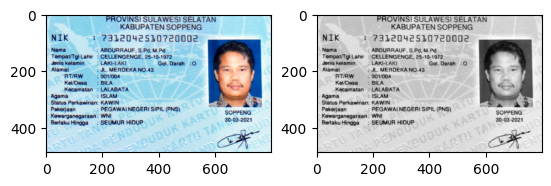

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_avg = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)






*   Lightness




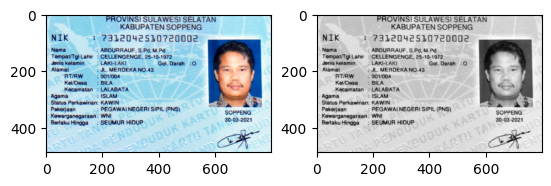

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_light = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)



*   Luminance




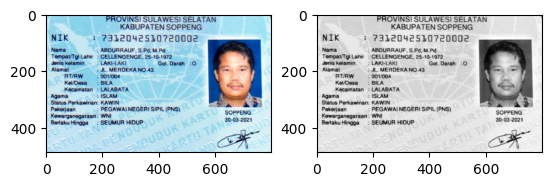

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# img_lum = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
# R, G, B = img_lum[:, : , 0], img_lum[:, :, 1], img_lum[:, :, 2]
# gray_img_lum = (0,21 * R)+(0,72 * G)+(0.07 * B)
# fig, ax = plt.subplots(1,2)

# ax[0].imshow(img_rgb)
# ax[1].imshow(gray_img_lum, cmap = 'gray')

img_lum = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')




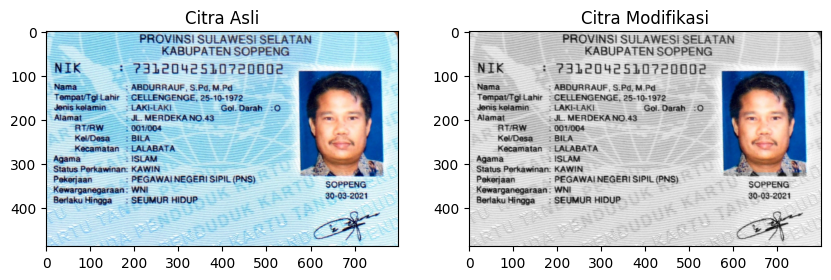

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
result_image = image.copy()

# Koordinat sudut kiri atas dan kanan bawah dari area yang akan dikecualikan dari grayscale
x1, y1 = 570, 90  # Koordinat sudut kiri atas
x2, y2 = 767, 320  # Koordinat sudut kanan bawah


for y in range(image.shape[0]):
    for x in range(image.shape[1]):

        if x1 <= x <= x2 and y1 <= y <= y2:

            result_image[y, x] = image[y, x]
        # if (x1 < 252,   )
        # else:

            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]

# Tampilkan citra hasil dengan menggunakan matplotlib

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Modifikasi')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.show()